## We are using MINST sign languge dataset from Kaggel.

The original MNIST(Modified National Institute of Standards and Technology) image dataset of handwritten digits is a popular benchmark for image-based machine learning methods. However it doesn't work for 2 of the english alphabets J and Z because it requires gesture motion.

In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now let's look at the pictures and label from our dataset.

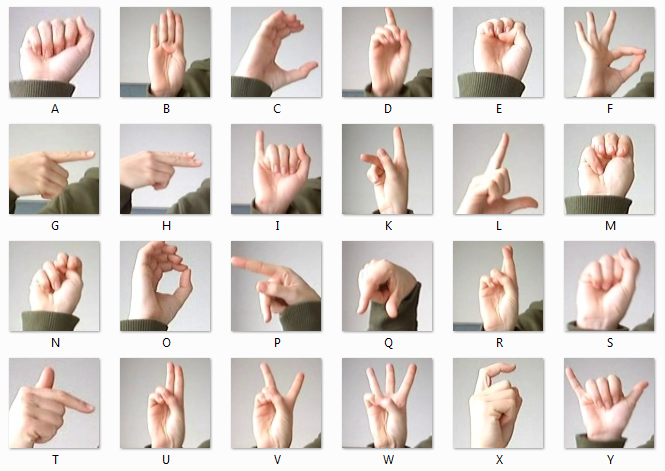

In [149]:
from IPython.display import Image
Image(filename="./archive/amer_sign2.png", width= 800, height=500)

Let's take a look at the raw images of american sign langauge.

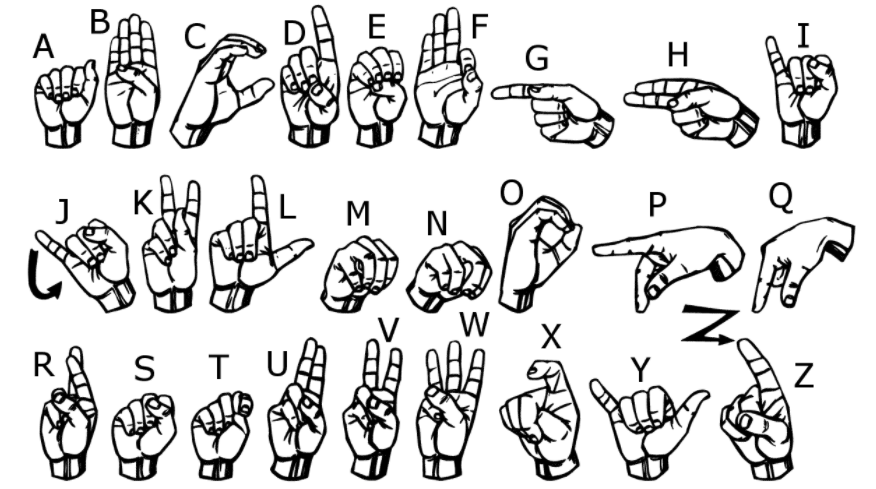

In [150]:
Image(filename="./archive/american_sign_language.PNG", width= 800, height=500)

## The alogorithm discussed in this notebook are SVM, CNN, KNN using PCA

We go through a step by step process to get the results:

1. Load the training and test data.
2. Plot the data to visulaize it properly.
3. Convert the pandas dataframe into numpy for easy calculation.
4. Data preprocessing and EDA
5. Training the data.
6. Defining the models
7. Model Performance Comparision
8. Conclusion

### 1. Loading the data

In [2]:
# Load the training dataset
train_csv_path = './archive/sign_mnist_train.csv'
train_data = pd.read_csv(train_csv_path)

# Load the testing dataset
test_csv_path = './archive/sign_mnist_test.csv'
test_data = pd.read_csv(test_csv_path)

## Getting to know our data.

### Familarizing with the data

In [152]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [153]:
#Shape of dataframe
print(f"Dataset Shape: {train_data.shape}")

Dataset Shape: (27455, 785)


In [154]:
#checking the data for null or missing values

train_data.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [155]:
# checking info of dataframe

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [156]:
# checking unique value in dataset

labels=train_data.label.unique()
np.sort(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [157]:
# describtion of dataset

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


We can do the same tests for the testing dataset to verify all the records check out.

### Visualizing the sample data

Let's see what our data looks like. Visualizing the sample images:

In [158]:
X, y = train_data.iloc[:, 1:].values, train_data.iloc[:, 0].values

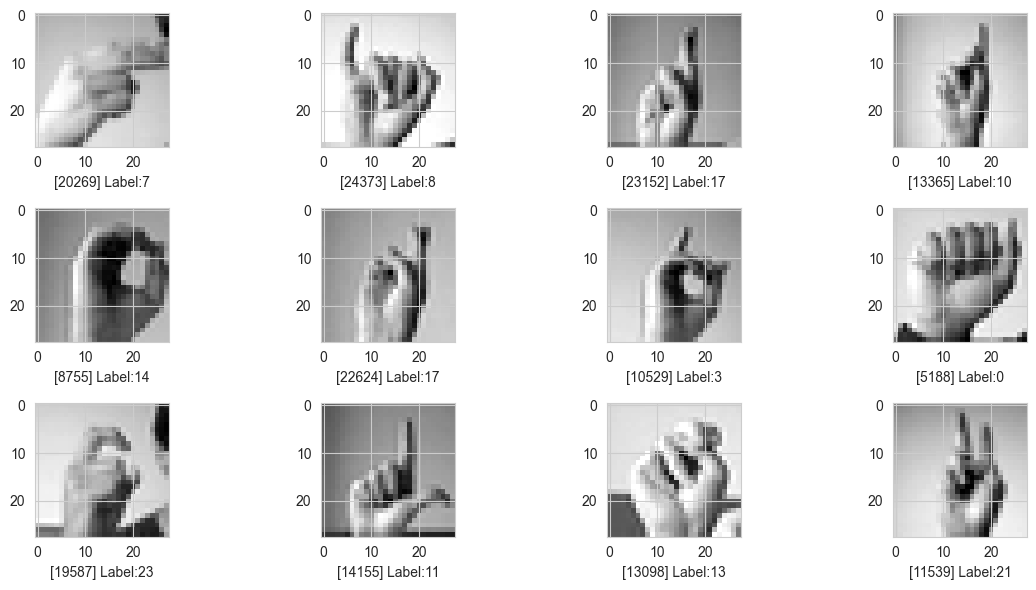

In [164]:
fig, axes = plt.subplots(3, 4)
for ax in axes.flatten():
    idx = random.randint(0, X.shape[0])
    ax.imshow(np.reshape(X[idx], (-1, 28)), cmap="gray")
    ax.set_xlabel(f"[{idx}] Label:{y[idx]}")
fig.tight_layout()

Let's look at how many data we have for each class.

In [134]:
import seaborn as sns

# Define a color palette beacause Asthetic has to be the vibe.
custom_palette = [
      "#506F6A",  # Deep Teal
    "#C3C0CA",  # Light Beige
    "#B5C99A",  # Light Olive
    "#B68B60",  # Tan
    "#8A9A91",  # Muted Teal
    "#BA6A4A",  # Burnt Orange
    "#794F34",  # Chocolate
    "#2E3E50",  # Deep Navy
    "#4B4B40"   # Dark Brown
]

# Set the seaborn palette
sns.set_palette(custom_palette)

# Set the plot background style
sns.set_style("whitegrid", {"axes.facecolor": "#F2ECE1"})

/var/folders/j_/592wcl6n2sxd69wqbjfgp4mw0000gn/T/ipykernel_23968/4128866047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette=custom_palette)
/var/folders/j_/592wcl6n2sxd69wqbjfgp4mw0000gn/T/ipykernel_23968/4128866047.py:2: UserWarning: 
The palette list has fewer values (9) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=labels, palette=custom_palette)


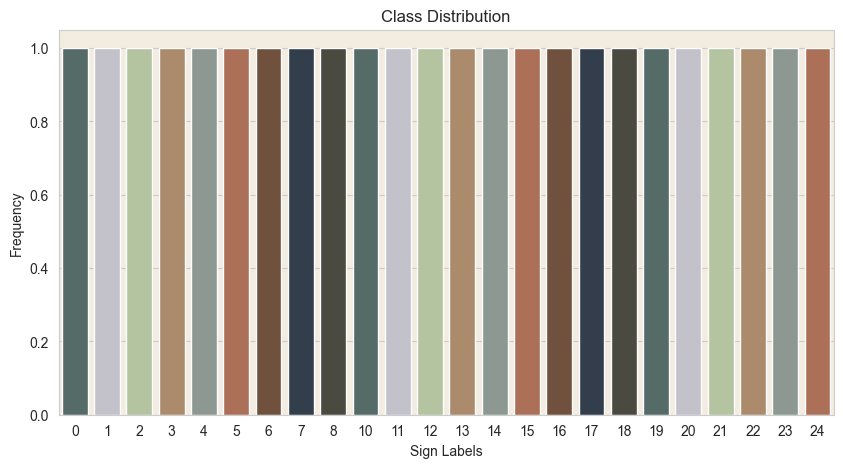

In [160]:
plt.figure(figsize=(10, 5))
sns.countplot(x=labels, palette=custom_palette)
plt.title("Class Distribution")
plt.xlabel("Sign Labels")
plt.ylabel("Frequency")
plt.show()

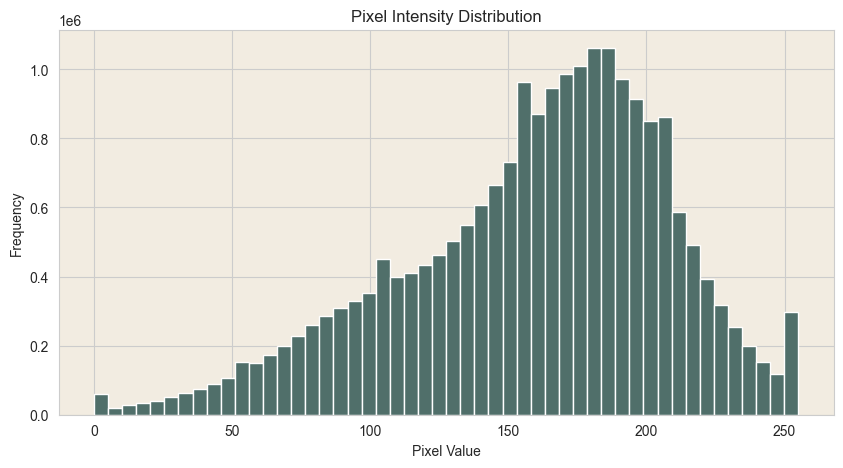

In [136]:
plt.figure(figsize=(10, 5))
plt.hist(train_data.iloc[:, 1:].values.ravel(), bins=50, range=[0, 255])
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


Since the pixel intensities vary significantly, normalization (e.g., scaling values to the range 0-1) may help to stabilize and standardize the data for model training.

Let's visualize the same average intensities of pixel in a heat map.

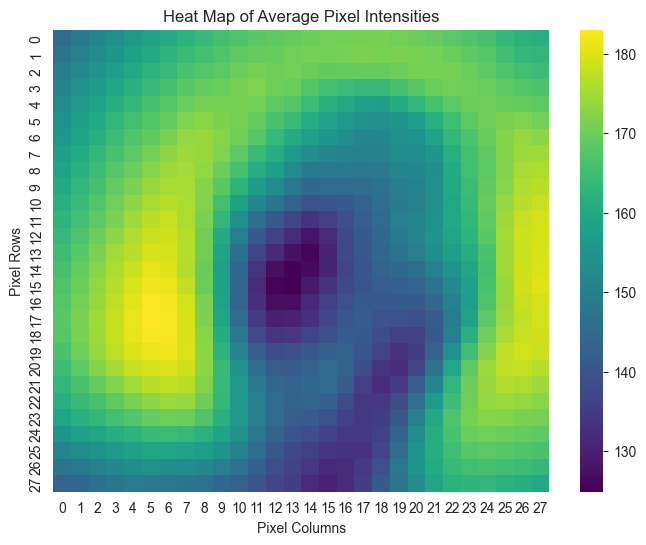

In [72]:
# Compute the average image
average_image = train_data.iloc[:, 1:].mean(axis=0).values.reshape(28, 28)

# Create a heat map
plt.figure(figsize=(8, 6))
sns.heatmap(average_image, cmap="viridis", cbar=True)
plt.title("Heat Map of Average Pixel Intensities")
plt.xlabel("Pixel Columns")
plt.ylabel("Pixel Rows")
plt.show()


Let's visualize a specific label sample.

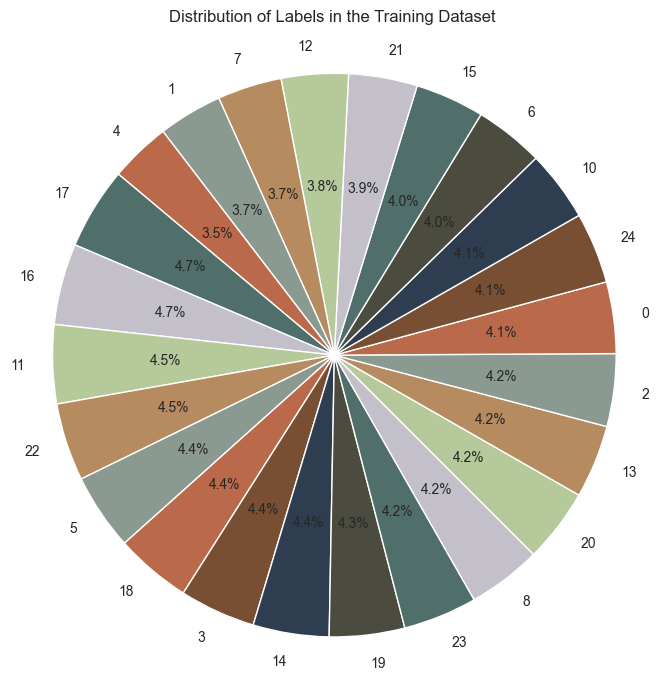

In [137]:
# Count occurrences of each label
label_counts = train_data['label'].value_counts()

# Extract labels and their counts
labels = label_counts.index
sizes = label_counts.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels in the Training Dataset \n')
plt.axis('equal')
plt.show()

Data change to numpy arrays

In [98]:
# Converting the pandas Dataframe into Numpy Arrays

inputs_array_train = train_data.iloc[:, 1:].to_numpy()
targets_array_train = train_data['label'].to_numpy()
inputs_array_test = test_data.iloc[:, 1:].to_numpy()
targets_array_test = test_data['label'].to_numpy()

In [ ]:
# Converting the pandas Dataframe into Numpy Arrays

inputs_array_train = train_dataframe.iloc[:, 1:].to_numpy()
targets_array_train = train_dataframe['label'].to_numpy()
inputs_array_test = test_dataframe.iloc[:, 1:].to_numpy()
targets_array_test = test_dataframe['label'].to_numpy()

In [ ]:
# Defining Fuction for Displaying Train Image

def Show_Train_Image(row):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
    fig.figsize=(1,1)
    img =np.reshape(inputs_array_train[row], (28, 28))
    print("Actual Label : ",chr(ord('A')+targets_array_train[row]))
    ax1.set_title("Original Image")
    ax1.axis("off")
    ax1.imshow(img);
    ax2.axis("off")
    ax2.set_title("Gray Image")
    ax2.imshow(img,cmap='gray');


# Defining Fuction for Displaying Test Image 

def Show_Test_Image(row,y_test):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
    fig.figsize=(1,1)
    img =np.reshape(inputs_array_train[row], (28, 28))
    print("Actual Label : ",chr(ord('A')+targets_array_train[row]))
    print("Predicted Label : ",chr(ord('A')+y_test[row]))
    ax1.set_title("Original Image")
    ax1.axis("off")
    ax1.imshow(img);
    ax2.axis("off")
    ax2.set_title("Gray Image")
    ax2.imshow(img,cmap='gray');

Actual Label :  H


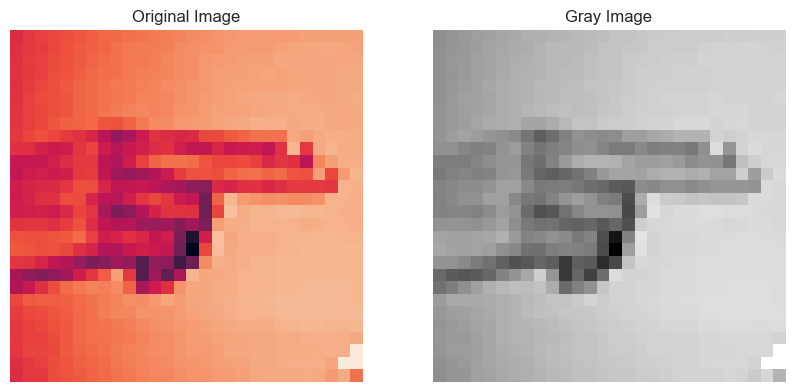

In [99]:
# showing training Image

Show_Train_Image(345)

Actual Label :  Q


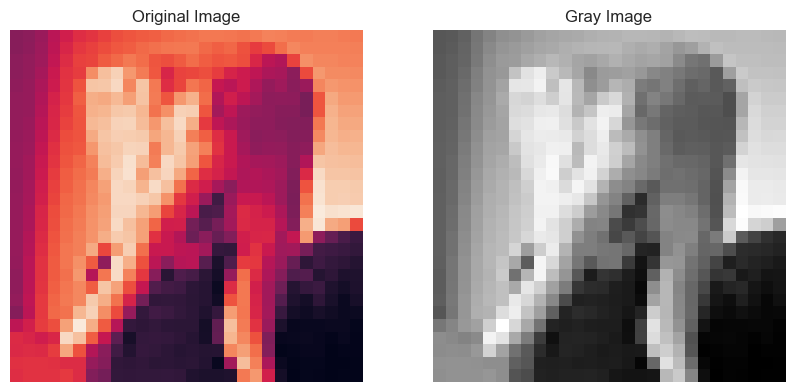

In [100]:
Show_Train_Image(945)

In [103]:
label_for_image = train_data.iloc[109, 0]  # Assuming the first column contains labels
print(f"The label for the image at index 945 is: {label_for_image}")

The label for the image at index 945 is: 18


## Data pre-processing

In [120]:
# Normlization of datasets

X_train=inputs_array_train/255
X_test=inputs_array_test/255

y_train = targets_array_train  
y_test  = targets_array_test


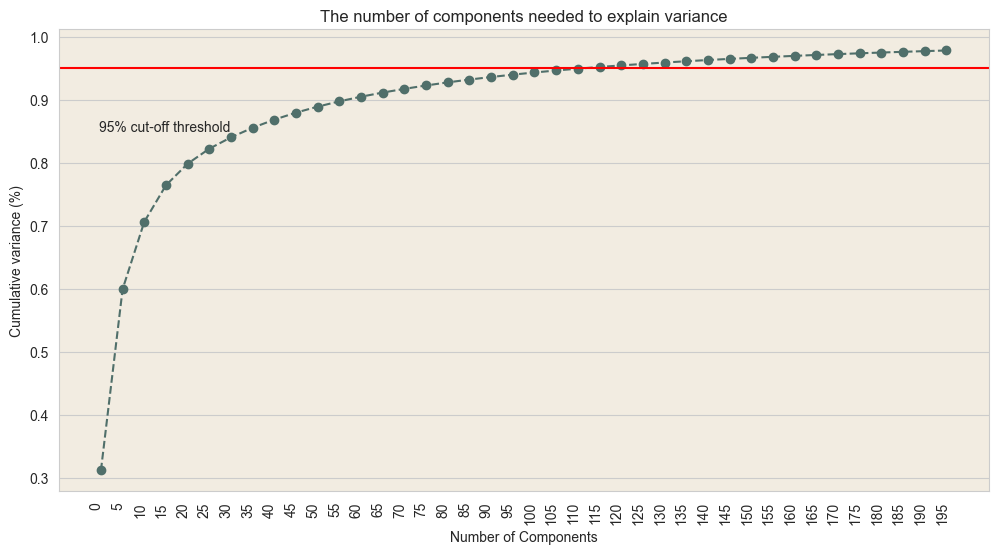

The number of components needed to explain variance :  113


In [140]:
# Calculating n_component value for PCA

from sklearn import metrics 
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
x = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x[:200:5], y[:200:5], marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 200, step=5),rotation=90)
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold')

ax.grid(axis='x')
plt.show()

for i,j in zip(x,y):
    if(j>0.95):
        print('The number of components needed to explain variance : ',i)
        break

## Model Building & Training:

In [122]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## Support Vector Classifier model 


In [123]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# instantiate the model
svc= Pipeline([('reduce_dims', PCA(n_components=113)),('model', SVC())])

# fit the model 
svc.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)), ('model', SVC())])

In [124]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [110]:
#computing the accuracy of the model performance
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)

print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))

Support Vector Machine : Accuracy on training Data: 1.000
Support Vector Machine : Accuracy on test Data: 0.853


In [125]:
#computing the classification report of the model
from sklearn import metrics 
print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      1.00      1.00       432
           2       0.86      0.99      0.92       310
           3       0.92      1.00      0.96       245
           4       0.94      0.99      0.97       498
           5       0.75      0.83      0.79       247
           6       0.94      0.92      0.93       348
           7       0.98      0.95      0.97       436
           8       0.81      0.89      0.85       288
          10       0.81      0.66      0.73       331
          11       0.87      0.97      0.92       209
          12       0.84      0.73      0.78       394
          13       0.90      0.66      0.76       291
          14       0.97      0.84      0.90       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.33      0.62      0.43       144
          18       0.71    

<Figure size 1000x1000 with 0 Axes>

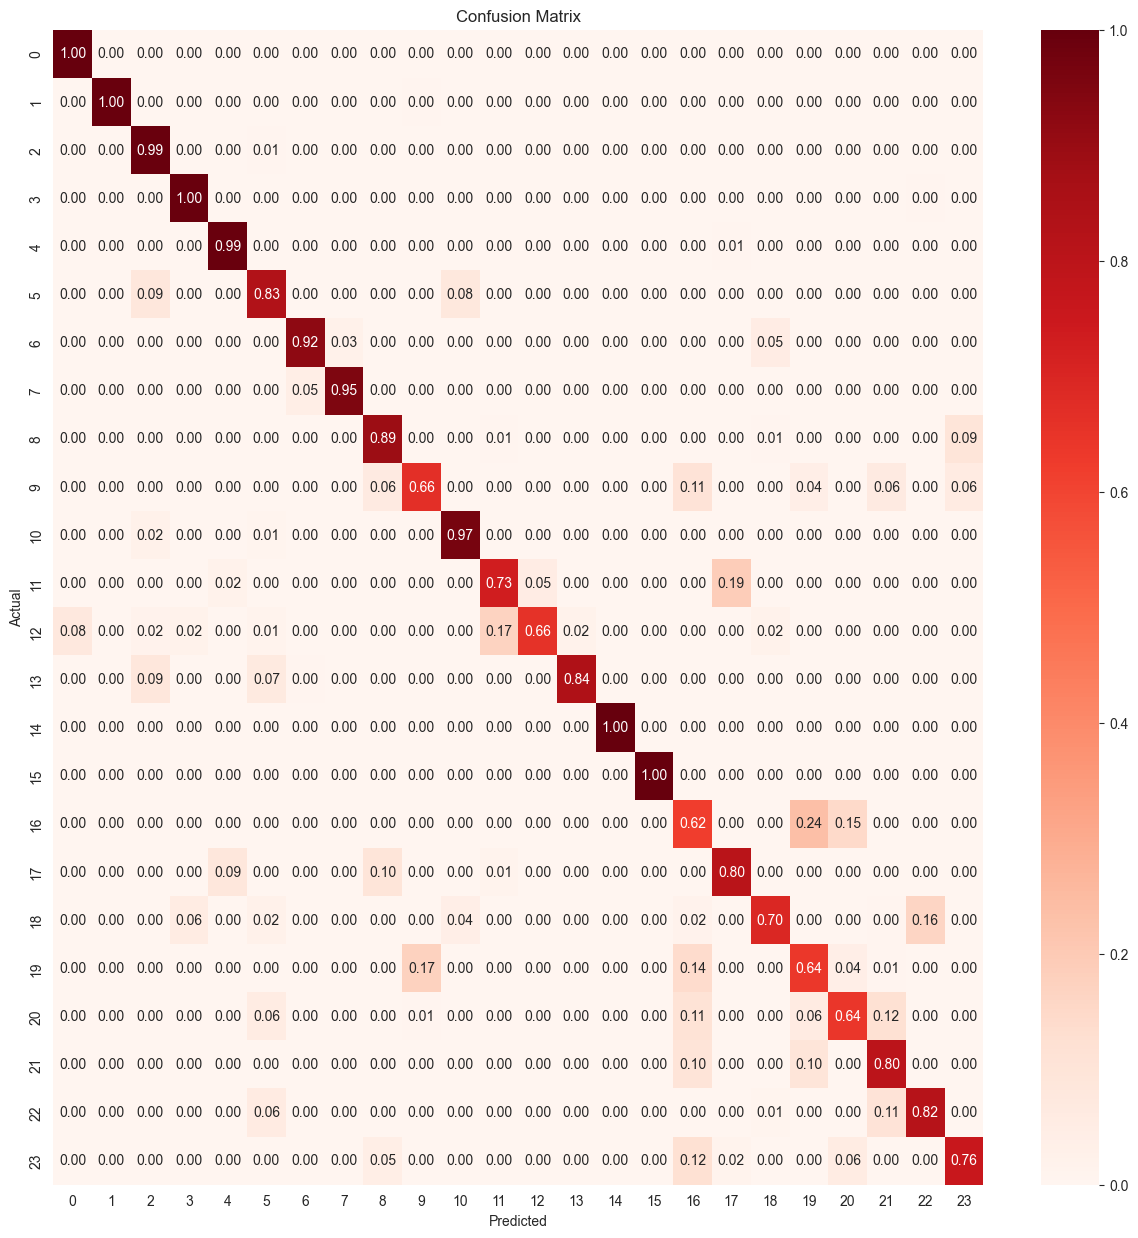

In [146]:
#visualization of Confusion Matrix 

plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_svc)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Reds')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

In [127]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Support Vector Machine',acc_train_svc, acc_test_svc)

In [129]:
# storing model for future use
import os
import joblib

# Directory and file name
folder_path = "model"
file_name = "SVM_model"

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the model
joblib.dump(svc, os.path.join(folder_path, file_name))
print(f"Model saved successfully at {os.path.join(folder_path, file_name)}")

Model saved successfully at model/SVM_model


Actual Label :  V
Predicted Label :  M


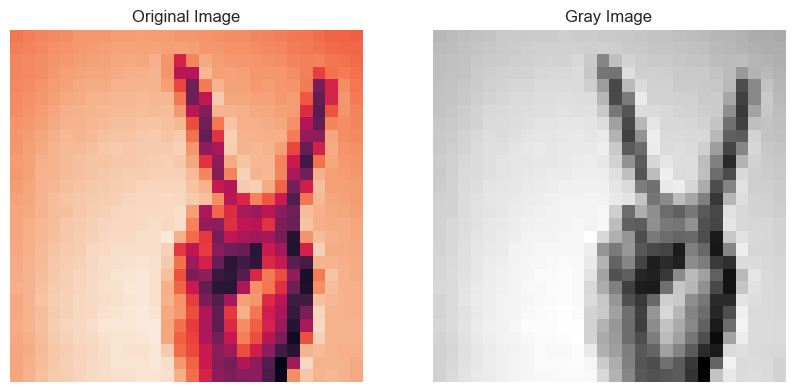

In [130]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(1214,y_test_svc)

## Custom SVM class

In [111]:
import numpy as np

class CustomSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        """
        Train the SVM model using the training dataset.
        """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Convert labels to -1 and 1 for hinge loss calculation
        y_ = np.where(y <= 0, -1, 1)

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        """
        Make predictions using the trained model.
        """
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


# Example of how to use the CustomSVM class
if __name__ == "__main__":
    from sklearn.datasets import load_digits
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    # Load MNIST or a similar dataset (sign language detection dataset can be used here)
    digits = load_digits()
    X, y = digits.data, digits.target

    # For simplicity, let's classify digits "0" and "1" (binary classification)
    binary_class_indices = (y == 0) | (y == 1)
    X, y = X[binary_class_indices], y[binary_class_indices]

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the dataset
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the custom SVM
    svm = CustomSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    svm.fit(X_train, y_train)

    # Make predictions
    predictions = svm.predict(X_test)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.5138888888888888


In [113]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from itertools import product

pca = PCA(n_components=150)  # Try increasing from 113 to 150+
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Custom SVM class
class CustomSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


# Hyperparameter tuning
def grid_search(X_train, y_train, X_test, y_test, param_grid):
    best_params = None
    best_accuracy = 0
    results = []

    # Iterate over all combinations of hyperparameters
    for params in product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))

        # Create and train the model
        svm = CustomSVM(**param_dict)
        svm.fit(X_train, y_train)

        # Evaluate the model
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Save the results
        results.append((param_dict, accuracy))

        # Update the best parameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = param_dict

    return best_params, best_accuracy, results


if __name__ == "__main__":
    from sklearn.datasets import load_digits

    # Load a dataset
    digits = load_digits()
    X, y = digits.data, digits.target

    # Binary classification for simplicity (e.g., classify "0" and "1")
    binary_class_indices = (y == 0) | (y == 1)
    X, y = X[binary_class_indices], y[binary_class_indices]

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the hyperparameter grid
    param_grid = {
        "learning_rate": [0.001, 0.01, 0.1],
        "lambda_param": [0.001, 0.01, 0.1],
        "n_iters": [1000, 2000]
    }

    # Perform grid search
    best_params, best_accuracy, results = grid_search(X_train, y_train, X_test, y_test, param_grid)

    # Output results
    print("Best Parameters:", best_params)
    print("Best Accuracy:", best_accuracy)

    # Optionally print all results
    for params, accuracy in results:
        print(f"Params: {params}, Accuracy: {accuracy}")


ValueError: n_components=150 must be between 0 and min(n_samples, n_features)=64 with svd_solver='full'

In [114]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_scor

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Train the model using gradient descent."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Predict the class labels."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Convert probabilities to binary class labels
        return np.where(y_predicted >= 0.5, 1, 0)


# Example Usage
if __name__ == "__main__":
    from sklearn.datasets import load_digits

    # Load MNIST-like dataset (sign language detection can be used similarly)
    digits = load_digits()
    X, y = digits.data, digits.target

    # For simplicity, perform binary classification (e.g., classify digits 0 and 1)
    binary_class_indices = (y == 0) | (y == 1)
    X, y = X[binary_class_indices], y[binary_class_indices]

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the custom Logistic Regression model
    model = CustomLogisticRegression(learning_rate=0.01, n_iters=1000)
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.3f}")


Accuracy: 1.000


In [116]:
import numpy as np

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Train the model using gradient descent."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            # Compute linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid activation function
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Predict class labels for input data."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

    def accuracy(self, y_true, y_pred):
        """Compute accuracy of the predictions."""
        return np.sum(y_true == y_pred) / len(y_true)


# Custom dataset utilities
def standardize(X):
    """Standardize dataset (mean=0, std=1)."""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

def train_test_split(X, y, test_size=0.2, random_state=None):
    """Split dataset into training and testing sets."""
    if random_state:
        np.random.seed(random_state)
    indices = np.random.permutation(X.shape[0])
    test_size = int(test_size * X.shape[0])
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


# Main function
if __name__ == "__main__":
    # Generate a toy dataset (MNIST-like, binary classification)
    from sklearn.datasets import load_digits  # For simplicity, generating data
    digits = load_digits()
    X, y = digits.data, digits.target

    # Binary classification: filter for digits "0" and "1"
    binary_class_indices = (y == 0) | (y == 1)
    X, y = X[binary_class_indices], y[binary_class_indices]

    # Normalize input features
    X = standardize(X)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Logistic Regression model
    model = CustomLogisticRegression(learning_rate=0.01, n_iters=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = model.accuracy(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.486


/var/folders/j_/592wcl6n2sxd69wqbjfgp4mw0000gn/T/ipykernel_23968/1560106645.py:50: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std


# Custom Logistic Regression

In [3]:
import pandas as pd
import numpy as np

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, num_classes=None):
        """
        Initialize the Logistic Regression model
        
        Parameters:
        - learning_rate: step size for gradient descent
        - num_iterations: number of training iterations
        - num_classes: number of unique classes in the dataset
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.num_classes = num_classes
        self.weights = None
        self.bias = None
        self.class_mapping = None  # To handle zero-based indexing

    def _softmax(self, z):
        """
        Softmax activation function for multiclass classification
        Prevents numerical instability by subtracting max value
        
        Parameters:
        - z: input array of logits
        
        Returns:
        - Softmax probabilities
        """
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _one_hot_encode(self, y):
        """
        Convert labels to one-hot encoded format
        
        Parameters:
        - y: original labels
        
        Returns:
        - One-hot encoded labels
        """
        # Remap labels to zero-based index if needed
        if self.class_mapping is None:
            unique_classes = np.unique(y)
            self.class_mapping = {orig: idx for idx, orig in enumerate(unique_classes)}
            self.reverse_mapping = {idx: orig for orig, idx in self.class_mapping.items()}
        
        # Map original labels to zero-based index
        y_mapped = np.array([self.class_mapping[label] for label in y])
        
        # Create one-hot encoding
        one_hot = np.zeros((y.shape[0], self.num_classes))
        one_hot[np.arange(y.shape[0]), y_mapped] = 1
        return one_hot

    def fit(self, X, y):
        """
        Train the logistic regression model
        
        Parameters:
        - X: input features (num_samples, num_features)
        - y: target labels
        """
        # Determine number of classes if not specified
        unique_classes = np.unique(y)
        self.num_classes = len(unique_classes)
        
        # Initialize weights and bias
        num_features = X.shape[1]
        self.weights = np.zeros((num_features, self.num_classes))
        self.bias = np.zeros((1, self.num_classes))
        
        # One-hot encode labels
        Y_one_hot = self._one_hot_encode(y)
        
        # Gradient descent
        for _ in range(self.num_iterations):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._softmax(linear_model)
            
            # Compute gradients
            dw = (1/X.shape[0]) * np.dot(X.T, (y_predicted - Y_one_hot))
            db = (1/X.shape[0]) * np.sum(y_predicted - Y_one_hot, axis=0, keepdims=True)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Make predictions on input data
        
        Parameters:
        - X: input features
        
        Returns:
        - Predicted class labels (original class labels)
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._softmax(linear_model)
        
        # Get indices of max probabilities
        predicted_indices = np.argmax(y_predicted, axis=1)
        
        # Map back to original class labels
        return np.array([self.reverse_mapping[idx] for idx in predicted_indices])

    def predict_proba(self, X):
        """
        Predict class probabilities
        
        Parameters:
        - X: input features
        
        Returns:
        - Predicted class probabilities
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self._softmax(linear_model)

    def accuracy(self, X, y):
        """
        Compute model accuracy
        
        Parameters:
        - X: input features
        - y: true labels
        
        Returns:
        - Accuracy score
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

def preprocess_sign_mnist(train_data, test_data):
    """
    Preprocess Sign MNIST dataset
    
    Parameters:
    - train_data: Training dataframe
    - test_data: Testing dataframe
    
    Returns:
    - Preprocessed X_train, X_test, y_train, y_test
    """
    # Separate features and labels
    X_train = train_data.drop('label', axis=1).values
    y_train = train_data['label'].values
    
    X_test = test_data.drop('label', axis=1).values
    y_test = test_data['label'].values
    
    # Normalize pixel values to [0, 1]
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    print("Unique training classes:", np.unique(y_train))
    print("Unique testing classes:", np.unique(y_test))
    
    return X_train, X_test, y_train, y_test

def train_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Train custom Logistic Regression on Sign MNIST
    
    Parameters:
    - X_train: Training features
    - X_test: Testing features
    - y_train: Training labels
    - y_test: Testing labels
    
    Returns:
    - Trained model
    - Training and test accuracies
    """
    # Create and train the model
    clf = CustomLogisticRegression(
        learning_rate=0.1,  # You can tune this
        num_iterations=1000,  # You can increase for better convergence
        num_classes=len(np.unique(y_train))
    )
    
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Compute accuracies
    train_accuracy = clf.accuracy(X_train, y_train)
    test_accuracy = clf.accuracy(X_test, y_test)
    
    return clf, train_accuracy, test_accuracy

# Main execution
def main():
    # Load the training dataset
    train_csv_path = './archive/sign_mnist_train.csv'
    train_data = pd.read_csv(train_csv_path)
    
    # Load the testing dataset
    test_csv_path = './archive/sign_mnist_test.csv'
    test_data = pd.read_csv(test_csv_path)
    
    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_sign_mnist(train_data, test_data)
    
    # Train the model
    model, train_acc, test_acc = train_logistic_regression(X_train, X_test, y_train, y_test)
    
    # Print results
    print(f"Training Accuracy: {train_acc * 100:.2f}%")
    print(f"Testing Accuracy: {test_acc * 100:.2f}%")
    
    return model, X_test, y_test

# Optional: Confusion Matrix and Classification Report
def evaluate_model(model, X_test, y_test):
    """
    Generate detailed model evaluation
    
    Parameters:
    - model: Trained logistic regression model
    - X_test: Test features
    - y_test: Test labels
    """
    # Predictions
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    from sklearn.metrics import confusion_matrix, classification_report
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Run the main function
if __name__ == "__main__":
    model, X_test, y_test = main()
    evaluate_model(model, X_test, y_test)

Unique training classes: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Unique testing classes: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Training Accuracy: 76.39%
Testing Accuracy: 63.43%
Confusion Matrix:
[[323   0   0   0   0   0   0   0   0   0   0   0   3   4   0   0   0   1
    0   0   0   0   0   0]
 [  0 349   0   0   0   0   0   0   0  75   0   0   0   0   0   0   0   0
    0   0   0   8   0   0]
 [  0   0 264   0   0  16   0   0   0   0   5   0   0  19   0   0   0   0
    0   0   0   0   6   0]
 [  0   0   0 153   0   0   0   0   0  15   0   0  14   0   0   0   0   5
    0   0   6   0  52   0]
 [  0   0   0   0 435   0   0   0   0   0   0   0   0   0   0   0   0  63
    0   0   0   0   0   0]
 [  0   0  20   0   0 201   0   0   0   0   1   0   0   5   0   0   0   0
    0   0   0  20   0   0]
 [  0   0   0  20   0   0 203  18   0   0   0   0  21  14   0  19   0   0
   52   0   0   0   1   0]
 [  0   0   0   0  16   0  